<a href="https://colab.research.google.com/github/chuxyno/School/blob/main/RL_BFS_DFS_Dijkstra_OSMNX_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install osmnx

In [ ]:
import networkx as nx
import osmnx as ox
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

ox.config(use_cache=True, log_console=True)

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.8/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [ ]:
# Function to generate map of the city

def generate_city_map(city):
  import requests
  import urllib.parse

  address = city
  url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

  response = requests.get(url).json()
  lon= float(response[0]["lon"])
  lat = float(response[0]["lat"])
  G = ox.graph_from_point((lat, lon), dist=750, network_type='drive')
  #ox.plot_graph(G)
  print('\n') 
  return G

In [ ]:
from networkx.classes.ordered import Graph
# Import necessary modules
import networkx as nx
from queue import Queue

from collections import deque

def bfs_shortest_path(graph, start, goal):    
    points_list = graph.edges
    nodes = list(np.unique(points_list))
    p_list_index = transform_points_to_index(points_list, nodes)
    start = nodes.index(start)
    goal = nodes.index(goal)
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[start]]
 
    # return path if start is goal
    if start == goal:
        return "That was easy! Start = goal"
 
    # keeps looping until all possible paths have been checked
    while queue:
        # pop the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        if node not in explored:
            #neighbours = graph[node]
            #print(node)
            neighbours = transform_point_to_index(get_node_edges(nodes[node],graph), nodes)
            #print(neighbours)
            # go through all neighbour nodes, construct a new path and
            # push it into the queue
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # return path if neighbour is goal
                if neighbour == goal:
                    return new_path
 
            # mark node as explored
            explored.append(node)
 
    # in case there's no path between the 2 nodes
    return "So sorry, but a connecting path doesn't exist :(("

def call_bfs_shortest_path(graph, starting_point, end_point):
  import time
  points_list = graph.edges
  nodes = list(np.unique(points_list))
  #p_list_index = transform_points_to_index(points_list, nodes)
  print('\n')
  start_time = time.time()  
  path = transform_index_to_points(bfs_shortest_path(graph, starting_point, end_point), nodes) 
  #print(transform_index_to_points(path, nodes)) 
  print("--- %s seconds to run BFS ---" % (time.time() - start_time))  
  print("\n")
  print('BFS short path distance (meters): ', calculate_distance(path,graph))  
  print_path(path,graph)
  print('\n')  
  plot_graph_route(graph, path)


# Function to find the shortest edge path in a graph using DFS
def shortest_edge_path_dfs(graph, start, end, path=[]):
  # Add the current node to the path
  path = path + [start]

  # Check if the current node is the end node
  if start == end:
    return path

  # Recursively search the graph for the end node
  for neighbor in graph[start]:
    if neighbor not in path:
      new_path = shortest_edge_path_dfs(graph, neighbor, end, path)
      if new_path:
        return new_path

  # If the end node is not reached, return an empty list
  return []

def call_shortest_edge_path_dfs(graph, start, end):  
  import time
  start_time = time.time()  
  path = shortest_edge_path_dfs(graph, start, end, path=[])
  print('\n')
  print("--- %s seconds for DFS to find a path ---" % (time.time() - start_time))
  print('\n')  
  print('DFS path distance (meters):', calculate_distance(path,graph))
  print_path(path, graph)
  print('\n')     
  plot_graph_route(graph, path)

#Function to print paths using Street names
def print_path(path, graph):
  # Create a graph from 'path'
  try:
    pathGraph = nx.path_graph(path)  
    

    # Read attributes from each edge
    for ea in pathGraph.edges():        
        try:
          if 'name' in graph.edges[(ea[0], ea[1],0)]:
            #print('Street Name: {0}, Highway: {1}'.format(G.edges[ea[0], ea[1],0]['name'],G.edges[ea[0], ea[1],0]['highway']))
            print('Street Name: {0}, Highway: {1}, Maxspeed: {2}, One way: {3}'.format(graph.edges[ea[0], ea[1],0]['name'],graph.edges[ea[0], ea[1],0]['highway'],graph.edges[ea[0], ea[1],0]['maxspeed'],graph.edges[ea[0], ea[1],0]['oneway']))
          elif 'name' not in graph.edges[(ea[0], ea[1],0)] and 'bridge' in graph.edges[(ea[0], ea[1],0)]:
            print('Bridge: {4}, Road: {0}, Highway: {1}, Maxspeed: {2}, One way: {3}'.format(graph.edges[ea[0], ea[1],0]['ref'],graph.edges[ea[0], ea[1],0]['highway'],graph.edges[ea[0], ea[1],0]['maxspeed'],graph.edges[ea[0], ea[1],0]['oneway'],graph.edges[ea[0], ea[1],0]['bridge']))
          else:
            print('Road: {0}, Highway: {1}, Maxspeed: {2}, One way: {3}'.format(graph.edges[ea[0], ea[1],0]['ref'],graph.edges[ea[0], ea[1],0]['highway'],graph.edges[ea[0], ea[1],0]['maxspeed'],graph.edges[ea[0], ea[1],0]['oneway']))
        #except KeyError:
          #print('Bridge: {4}, Road: {0}, Highway: {1}, Maxspeed: {2}, One way: {3}'.format(G.edges[ea[0], ea[1],0]['ref'],G.edges[ea[0], ea[1],0]['highway'],G.edges[ea[0], ea[1],0]['maxspeed'],G.edges[ea[0], ea[1],0]['oneway'],G.edges[ea[0], ea[1],0]['bridge']))
        except:
          print('Highway: {1}, One way: {0}'.format(graph.edges[ea[0], ea[1],0]['oneway'],graph.edges[ea[0], ea[1],0]['highway']))
          
  except BaseException as e:
      print('Path Error: ' + str(e))  

def calculate_distance(path, graph):
  pathGraph = nx.path_graph(path)
  total_distance = 0  
  for ea in pathGraph.edges():    
    distance = graph.edges[ea[0], ea[1],0]['length']    
    total_distance = total_distance + distance
  return total_distance

def dijsktra(graph, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    points_list = graph.edges
    nodes = list(np.unique(points_list))
    shortest_paths = {nodes.index(initial): (None, 0)}
    current_node = nodes.index(initial)
    end = nodes.index(end)
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        #print(current_node)
        #print(nodes[current_node])
        destinations = get_node_edges(nodes[current_node], graph)        
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in transform_point_to_index(destinations, nodes):
            weight = 0 #All weights are zeroed 
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    
    # Work back through destinations in shortest path
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    # Reverse path
    path = path[::-1]
    return transform_index_to_points(path, nodes)

def call_dijsktra(graph, initial, end):
  import time
  start_time = time.time()  
  path = dijsktra(graph, initial, end)
  print('\n')
  print("--- %s seconds for dijsktra to find a path ---" % (time.time() - start_time)) 
  print('\n')
  print('Dijsktra path distance (meters): ', calculate_distance(path,graph)) 
  print_path(path, graph)
  print('\n')  
  plot_graph_route(graph, path)


In [ ]:
#RL Algorithm
from networkx.classes.function import path_weight
def transform_points_to_index(points_list, nodes):
  #nodes = list(G.nodes)
  points_list_index = []
  for point in points_list:
    a= nodes.index(point[0])
    b = nodes.index(point[1])
    points_list_index.append((a,b))
  return points_list_index

def transform_point_to_index(point_list, nodes):
  #nodes = list(G.nodes)
  point_list_index = []
  for point in point_list:     
    point_list_index.append(nodes.index(point))
  return point_list_index

def transform_index_to_points(points_index,nodes):
  path = []
  for i in points_index:
    path.append(nodes[i])
  return path

def available_actions(state, R, nodes):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]    
    return av_act

def sample_next_action(available_act):
  try:
    if len(available_act) != 0:
      next_action = int(np.random.choice(available_act,1))
    else:
      next_action = '-1'
  except BaseException as e:
    print(e, available_act)
  return next_action


def update(current_state, action, gamma, Q, R):
  if str(action) != '-1':
    #if str(current_state) == '0':
      #print(current_state, action)
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))        
    else:
        max_index = int(max_index)        
    max_value = Q[action, max_index] 
      #if str(current_state) == '303':
        #print(current_state, action, R[current_state, action],  gamma , max_value,max_index) 
        #print(Q[action, max_index] )
    Q[current_state, action] = R[current_state, action] + gamma * max_value    #  MISTAKE MUST BE HERE
    if (np.max(Q) > 0):
      return(np.sum(Q/np.max(Q)*100))
    else:
      return (0)

 

def RL(graph, start_point: int,end_point: int):
  import os.path
  import time
  points_list = graph.edges
  nodes = list(np.unique(points_list))
  starting_point = start_point
  goal = end_point
  initial_state = nodes.index(start_point)
  #file_exists = os.path.exists('Q.csv')
  filename = str(start_point) + str(end_point) + '.csv'
  if os.path.exists(filename) == False:
   
    matrix_size = len(np.unique(points_list))
    
      # create matrix x*y
    R = np.matrix(np.ones(shape=(matrix_size, matrix_size)))
    R *= -1
    points_list_index = transform_points_to_index(points_list, nodes)
     # assign zeros to paths and 100 to goal-reaching point
    for point in points_list_index:
       
        if point[1] == nodes.index(goal):
          R[point[0],point[1]] = 100
        else:
          R[point[0],point[1]] = 0  

        if graph.edges[nodes[point[0]], nodes[point[1]],0]['oneway'] == False:
          if point[0] == nodes.index(goal):
            R[point[1],point[0]] = 100  
          else:
            R[point[1],point[0]] = 0  
    # add goal point round trip
    R[nodes.index(goal),nodes.index(goal)]= 100
    #print(R[0,])
    Q = np.matrix(np.zeros([matrix_size,matrix_size]))
    
    # learning parameter
    gamma = 0.8      
    
    start_time = time.time() 
    Q = RL_train(matrix_size, gamma, Q , R, nodes, goal)
    print("--- %s seconds to train ---" % (time.time() - start_time))      
    pd.DataFrame(Q).to_csv(filename, header=None, index=None) 
  else:
    Q =np.matrix(pd.read_csv(filename, header=None, index_col=None))
    
  RL_test(initial_state, nodes, end_point, Q, graph)

def RL_train(matrix_size, gamma, Q , R, nodes, goal):
  # Training
  scores = []
  for q in np.nditer(Q):
      try:
          current_state = np.random.randint(0, int(Q.shape[0]))
            #print(current_state)
          available_act = available_actions(current_state,R,nodes)
            #print(available_act)
          action = sample_next_action(available_act,)
            #print(action)
          score = update(current_state,action,gamma, Q,R)          
            #scores.append(score)
            #print ('Score:', str(score))
      except BaseException as e:
          print(e)
  return Q



def RL_test(initial_state, nodes, goal, Q, graph):
  # Testing
  import time
  start_time = time.time() 
  #print(Q[221,])
  current_state = initial_state
  steps = [current_state]
  i = 0
  while  current_state != nodes.index(goal):
      next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
      
      if next_step_index.shape[0] > 1:
          #print(next_step_index)
          next_step_index = int(np.random.choice(next_step_index, size = 1)) 
          #print(next_step_index)           
      else:
          next_step_index = int(next_step_index)
      
      steps.append(next_step_index)        
      current_state = next_step_index
      

  print("--- %s seconds to test ---" % (time.time() - start_time))
  print('\n')
  t_path = transform_index_to_points(steps, nodes)
  print('Shortest Path by RL distance (meters): ', calculate_distance(t_path, graph))
  #print(transform_index_to_points(steps, nodes))
  #print('\n')
  
  print_path(t_path, graph)
  print('\n')
    #generate_shortest_path_image(t_path)
  plot_graph_route(graph, t_path)
  
  #fig, ax = ox.plot_graph_route(G,  route=t_path, route_color='red')
    
  


In [ ]:
def plot_graph_route(graph, route):
    #generate_shortest_path_image(t_path)
    fig, ax = ox.plot_graph_route(graph,  route=route, route_color='red')
    #fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

def get_street_node(streetName, graph):
    coord = ''
    try:
      for ea in graph.edges():
        if 'name' in graph.edges[(ea[0], ea[1],0)]:   
          if str(graph.edges[ea[0], ea[1],0]['name']).lower() == str(streetName).lower():
            coord = ea            
            #return ea
            break   
      if coord == '':
        coord = 'Not Found'
    except BaseException as e:
      ea = 'Not Found'  
    return coord

def call_nx_short_path(graph, start_st_name,end_st_name):
  import time
  start_time = time.time() 
  path = nx.shortest_path(graph, start_st_name,end_st_name)
  print('\n')
  print("--- %s seconds for OSMNX to find path ---" % (time.time() - start_time))
  print('\n')
  path_length = nx.shortest_path_length(graph, start_st_name,end_st_name)  
  print('OSMNX short path distance (meters): ', calculate_distance(path,graph), path_length)
  #print('\n')
  print_path(path,graph)
  print('\n')
  plot_graph_route(graph, path)


def get_node_edges(node, graph):
  n = graph.edges(node)
  edges = []
  np.array(np.unique(n))
  for i in n:
    edges.append(i[1])
  return(edges)

In [ ]:
def get_street_to_search():
    import time
    #city = input('Enter city: ')
    city = 'Middlesbrough, UK'
    G= generate_city_map(city)
    start_time = time.time() 
    #for ea in G.edges():
      #print(G.edges[ea[0],ea[1],0])    
    start_st_name = get_street_node(input('Enter start street name: '),G)
    if start_st_name != 'Not Found':      
      start_st_name = start_st_name[0]
      print(start_st_name)
    else:
      print('Street name not found')
      return

    end_st_name = get_street_node(input('Enter end street name: '),G)
    if end_st_name != 'Not Found':
      end_st_name = end_st_name[1]
      print(end_st_name)
    else:
      print('Street name not found')
      return

    if 'Not Found' not in str(start_st_name) and 'Not Found' not in str(end_st_name):
      algorithm_choice = input('Select algorithm to use for search: (1) Reinforcement Learning (2) DFS (3) BFS (4) OSMNX (5) Dijsktra  ')
      if algorithm_choice == '1':
        RL(G, start_st_name,end_st_name)
        print("--- %s seconds ---" % (time.time() - start_time))
      elif algorithm_choice == '2':
        call_shortest_edge_path_dfs(G, start_st_name,end_st_name)
        print("--- %s seconds ---" % (time.time() - start_time))
      elif algorithm_choice == '3':
        call_bfs_shortest_path(G, start_st_name,end_st_name)
        print("--- %s seconds ---" % (time.time() - start_time))
      elif algorithm_choice == '4':
        call_nx_short_path(G, start_st_name,end_st_name)        
        print("--- %s seconds ---" % (time.time() - start_time))
      elif algorithm_choice == '5':
        call_dijsktra(G, start_st_name,end_st_name)        
        print("--- %s seconds ---" % (time.time() - start_time))



Enter start street name: Hartington Interchange
21477326
Enter end street name: Commercial street
1128212614
Select algorithm to use for search: (1) Reinforcement Learning (2) DFS (3) BFS (4) OSMNX (5) Dijsktra  1
--- 187.94765043258667 seconds to train ---
--- 0.0012869834899902344 seconds to test ---


Shortest Path by RL distance (meters):  2581.2109999999993
Street Name: Hartington Interchange, Highway: primary, Maxspeed: 30 mph, One way: False
Street Name: Hartington Interchange, Highway: primary, Maxspeed: 30 mph, One way: False
Street Name: Hartington Interchange, Highway: primary, Maxspeed: 30 mph, One way: False
Street Name: Hartington Interchange, Highway: primary, Maxspeed: 30 mph, One way: False
Bridge: yes, Road: A66, Highway: trunk_link, Maxspeed: 50 mph, One way: True
Bridge: yes, Road: A66, Highway: trunk, Maxspeed: 50 mph, One way: True
Street Name: Marton Road Interchange, Highway: trunk_link, Maxspeed: ['30 mph', '50 mph'], One way: True
Street Name: Marton Road In

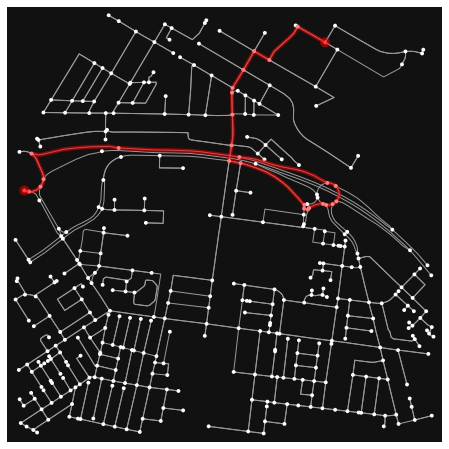

In [ ]:
get_street_to_search()